# Esercitazione 2  
## Basi ortonormali: Base standard e DCT (Prima parte)

### Sommario

L’esercitazione introduce le basi ortonormali, con particolare attenzione alla Trasformata Discreta del Coseno (DCT). L’obiettivo è quello di verificare numericamente alcune proprietà della matrice di trasformazione DCT, analizzare e confrontare le basi ortogonali e implementare la trasformata inversa. Inoltre, si introduce il prodotto scalare tra immagini in scala di grigi e si elaborerà una immagine digitale, verificandone le proprietà numeriche. L’obiettivo è acquisire strumenti matematici e computazionali per l’analisi di segnali e immagini.

In [2]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io as sio

#### Esercizio 1

Si consideri la matrice DCT definita come

$$
C_{n,k} =
\begin{cases}
\frac{1}{\sqrt{N}} \cos\left(\frac{(n+1/2)k\pi}{N}\right), & \text{se } k = 0, \\
\sqrt{\frac{2}{N}} \cos\left(\frac{(n+1/2)k\pi}{N}\right), & \text{altrimenti}
\end{cases}
$$
con $k = 0, \dots, N-1$, $n = 0, \dots, N-1$.

(a) Verificare con Python che $C^\top C = I$.  
(b) Visualizzare la base DCT di dimensione $N = 8$ usando la funzione `stem`.  
(c) Calcolare la DCT del segnale $ x = [0,0,2,3,4,0,0,0]^\top $. Scrivere una funzione che calcoli la DCT inversa di un vettore di coefficienti.

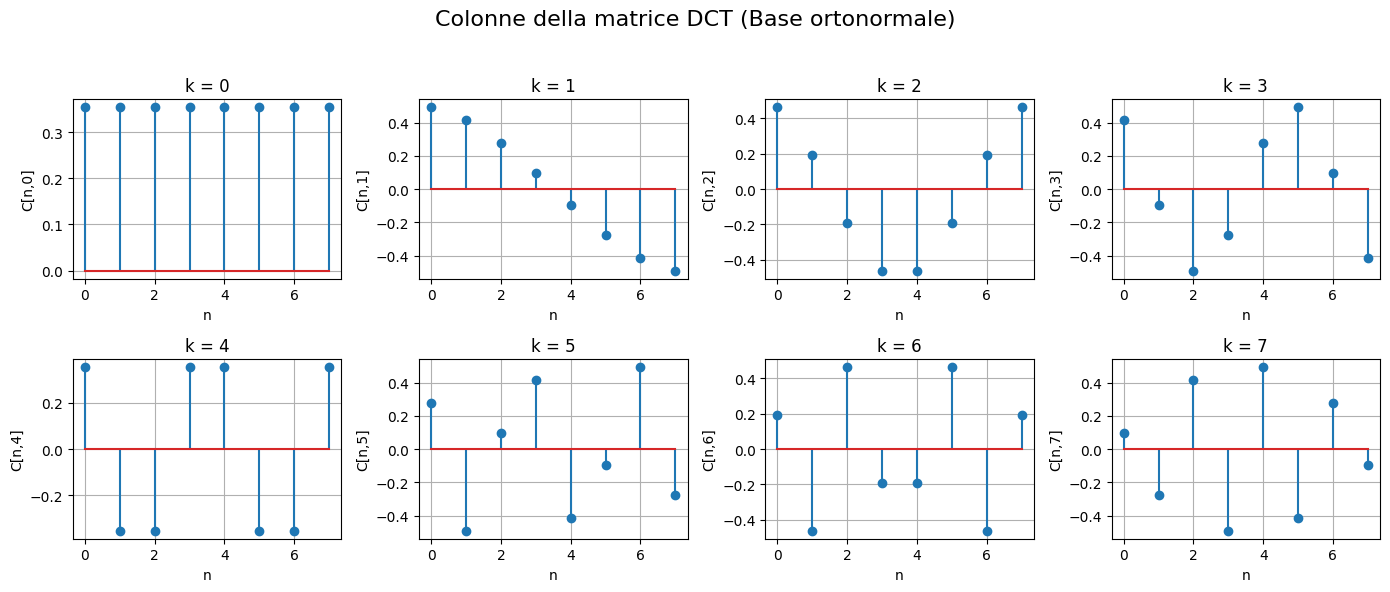

✅ La base DCT è ortonormale: Cᵀ·C ≈ I


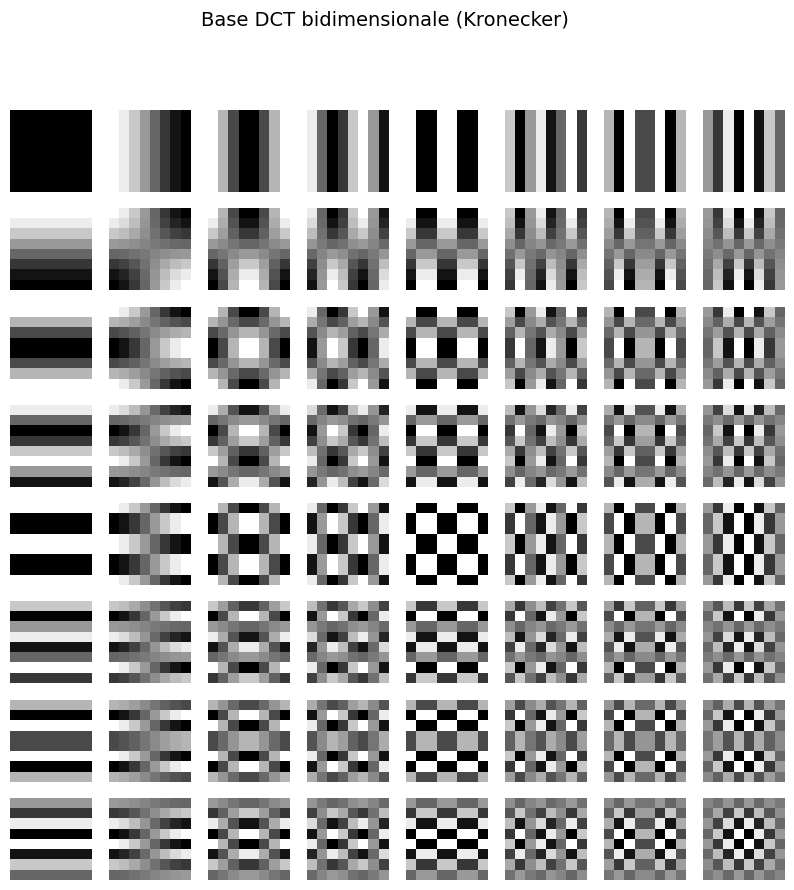

🧮 Coefficienti DCT di x: [ 3.18198052  0.45802507 -3.6162618  -0.70300016  1.76776695 -0.22064448
 -0.41551248  1.32186225]
🔁 Errore massimo tra x e DCT inversa: 2.55e-15


In [8]:
# Funzione per costruire la matrice DCT NxN
def DCT_matrix(N):
    C = np.zeros((N, N))
    for k in range(N):
        for n in range(N):
            alpha = 1/np.sqrt(N) if k == 0 else np.sqrt(2/N)
            C[n, k] = alpha * np.cos(np.pi / N * (n + 0.5) * k)
    return C

# Funzione prodotto scalare
def ps(A, B):
    return np.sum(A * B)

# Parametro dimensione
N = 8
C = DCT_matrix(N)

# --------------------------
# (b) Visualizzazione base DCT
# --------------------------
# Visualizza le colonne della matrice DCT in griglia 2x4
fig, axes = plt.subplots(2, 4, figsize=(14, 6))  # 2 righe, 4 colonne
fig.suptitle("Colonne della matrice DCT (Base ortonormale)", fontsize=16)

for k in range(N):
    row = k // 4
    col = k % 4
    ax = axes[row, col]
    ax.stem(C[:, k])
    ax.set_title(f"k = {k}")
    ax.set_xlabel("n")
    ax.set_ylabel(f"C[n,{k}]")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # lascia spazio al titolo
plt.show()


# --------------------------
# (a) Verifica ortonormalità: C^T C ≈ I
# --------------------------
check = np.dot(C.T, C)
if np.max(np.abs(check - np.eye(N))) < 1e-13:
    print("✅ La base DCT è ortonormale: Cᵀ·C ≈ I")
else:
    print("❌ La base DCT NON è ortonormale")

# --------------------------
# Visualizzazione bidimensionale base DCT (Kronecker)
# --------------------------
plt.figure(figsize=(10, 10))
for i, (k, n) in enumerate([(k, n) for k in range(N) for n in range(N)]):
    ax = plt.subplot(N, N, i + 1)
    base_2d = np.reshape(np.kron(C[:, k], C[:, n]), (N, N))
    ax.imshow(base_2d, cmap='gray')
    ax.axis('off')
plt.suptitle("Base DCT bidimensionale (Kronecker)", fontsize=14)
plt.show()

# --------------------------
# (c) DCT e DCT inversa
# --------------------------
x = np.zeros(N)
x[2] = 2
x[3] = 3
x[4] = 4

# Calcolo DCT del segnale x
X = np.dot(C.T, x)
print(f"🧮 Coefficienti DCT di x: {X}")

# Calcolo DCT inversa
x_inv = np.dot(C, X)
errore = np.max(np.abs(x_inv - x))
print(f"🔁 Errore massimo tra x e DCT inversa: {errore:.2e}")


#### Esercizio 2

Consideriamo una immagine in scala di grigi $64\times64$. Ogni pixel ha un valore intero compreso tra 0 e 255. Possiamo definire il prodotto scalare (verificare) tra due immagini $I_1$ e $I_2$ nel modo seguente:

$$
\langle I_1, I_2 \rangle = \sum_{n=1}^{64} \sum_{m=1}^{64} (I_1)_{n,m}\,(I_2)_{n,m}
$$

Scrivere una funzione che implementi il prodotto scalare definito sopra. Verificare su Python per un generico segnale della classe che l’operazione definita abbia le proprietà del prodotto scalare. Per definire un segnale generico usare:  
```python
np.floor(np.random.uniform(0,255,[64, 64]))
```

In [6]:
# --------------------------
# Funzione prodotto scalare tra immagini
# --------------------------
def ps(I1, I2):
    """
    Calcola il prodotto scalare tra due immagini 64x64
    """
    if I1.shape != (64, 64) or I2.shape != (64, 64):
        raise ValueError("Le immagini devono essere 64x64.")
    return np.sum(I1 * I2)

# --------------------------
# Setup: immagini casuali A, B, C e scalare a
# --------------------------
N = 64
A = np.floor(np.random.uniform(0, 255, [N, N]))
B = np.floor(np.random.uniform(0, 255, [N, N]))
C = np.floor(np.random.uniform(0, 255, [N, N]))
a = np.random.uniform(0, 1)  # uno scalare reale

# --------------------------
# Verifica 1: Distributività → ⟨A + B, C⟩ = ⟨A, C⟩ + ⟨B, C⟩
# --------------------------
left1 = ps(A + B, C)
right1 = ps(A, C) + ps(B, C)
error1 = np.abs(left1 - right1)
print(f"✅ Distributività: errore = {error1:.2e}")

# --------------------------
# Verifica 2: Simmetria → ⟨A, B⟩ = ⟨B, A⟩
# --------------------------
left2 = ps(A, B)
right2 = ps(B, A)
error2 = np.abs(left2 - right2)
print(f"✅ Simmetria: errore = {error2:.2e}")

# --------------------------
# Verifica 3: Linearità nel primo argomento → ⟨aA, B⟩ = a⟨A, B⟩
# --------------------------
left3 = ps(a * A, B)
right3 = a * ps(A, B)
error3 = np.abs(left3 - right3)
print(f"✅ Linearità nel primo argomento: errore = {error3:.2e}")

# --------------------------
# Verifica 4: Positività definita → ⟨A, A⟩ > 0 se A ≠ 0
# --------------------------
normA2 = ps(A, A)
print(f"✅ Positività definita: ⟨A, A⟩ = {normA2:.2f} → {'valida' if normA2 > 0 else 'non valida'}")


✅ Distributività: errore = 0.00e+00
✅ Simmetria: errore = 0.00e+00
✅ Linearità nel primo argomento: errore = 0.00e+00
✅ Positività definita: ⟨A, A⟩ = 87916849.00 → valida


#### Esercizio 3

Scattatevi un "selfie" in un ambiente bene illuminato. Convertite la foto in formato .jpg e ritagliate l’immagine in modo da ottenere una nuova immagine di $64\times64$ pixels (potete usare il convertitore online https://convert-my-image.com/ImageConverter).  
Convertite l’immagine in scala di grigi usando il grayscaler di onlinejpgtools.com.  
Ora aprite Python e:

(a) leggete l’immagine con  
```python
np.array(plt.imread('filename.jpg'), dtype='float64')[:,:,0]
```  
(b) visualizzate l’immagine con `imshow` di matplotlib  
(c) verificate che l’immagine sia in scala di grigi 64×64 pixels e che ogni pixel sia un intero 0–255.

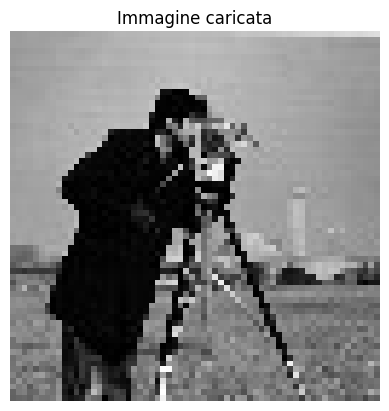

📏 Dimensioni immagine: (64, 64)
✅ L'immagine è di dimensione 64×64.
✅ I valori dei pixel sono interi.
✅ I valori dei pixel sono compresi tra 0 e 255.


In [9]:
# --------------------------
# (a) Lettura immagine 64×64 in scala di grigi
# --------------------------
# Assicurati che il file 'cameraman.jpg' sia nella stessa cartella del notebook
I = np.array(plt.imread('cameraman.jpg'), dtype='float64')

# Se l'immagine è RGB, si seleziona solo un canale (es: rosso o scala di grigi già presente)
if I.ndim == 3:
    I = I[:, :, 0]

# Visualizzazione dell’immagine
plt.imshow(I, cmap='gray')
plt.title("Immagine caricata")
plt.axis('off')
plt.show()

# --------------------------
# (c) Verifica dimensione
# --------------------------
print(f"📏 Dimensioni immagine: {I.shape}")
if I.shape == (64, 64):
    print("✅ L'immagine è di dimensione 64×64.")
else:
    print("❌ L'immagine NON è di dimensione 64×64.")

# --------------------------
# Verifica se valori sono interi
# --------------------------
if np.all(np.floor(I) == I):
    print("✅ I valori dei pixel sono interi.")
else:
    print("❌ I valori dei pixel NON sono tutti interi.")

# --------------------------
# Verifica se valori sono nel range [0, 255]
# --------------------------
if np.all((I >= 0) & (I <= 255)):
    print("✅ I valori dei pixel sono compresi tra 0 e 255.")
else:
    print("❌ Alcuni pixel non sono nel range [0, 255].")
